<a href="https://colab.research.google.com/github/skolouri/Ashkan13776.github.io/blob/master/Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install POT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.9/702.9 kB 12.2 MB/s eta 0:00:00


In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import ot
import ot.plot

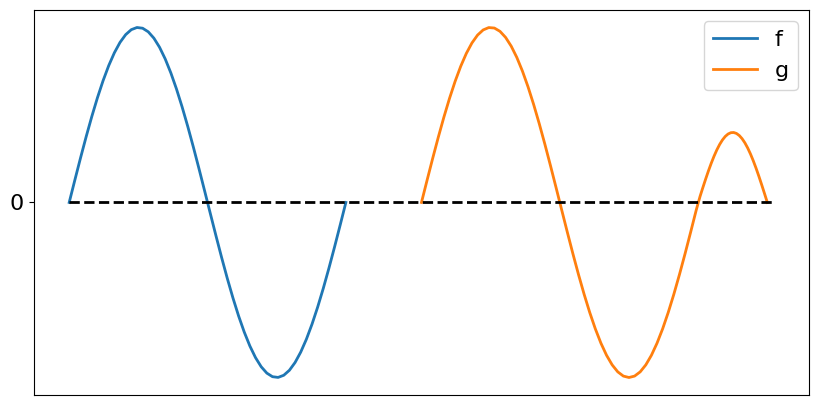

In [ ]:
a = np.linspace(0, 2*np.pi, num=50)
sina = np.sin(a)
signal1 = np.stack([a,sina],axis=1)

b = np.linspace(0, 3*np.pi, num=75)
sinb=np.where(b<2*np.pi, np.sin(b), 0.4*np.sin(b))
b = np.where(b<2*np.pi,b,(b-2*np.pi)*0.5+2*np.pi)
signal2 = np.stack([b+8,sinb],axis=1)

M = sp.spatial.distance.cdist(signal1, signal2)

# plt.scatter(signal1[:,0], signal1[:,1], s=4)
# plt.scatter(signal2[:,0], signal2[:,1], s=4)
# plt.show()
plt.figure(figsize=(10,5))
plt.plot(signal1[:,0], signal1[:,1],linewidth=2,label='f')
plt.plot(signal2[:,0], signal2[:,1],linewidth=2,label='g')
plt.plot(np.arange(17),np.zeros(17,),'--k',linewidth=2)
plt.legend(fontsize=16)
plt.yticks([0],['0'],fontsize=16)
plt.xticks([])
plt.savefig('./fg.pdf',bbox_inches='tight')

In [ ]:
# p = ot.unif(50)
# q = ot.unif(75)
p=np.ones((50))
q=np.ones((75))

opt, log = ot.partial.partial_wasserstein2(p, q, M, m=50, log=True)
plan = log['T']
# w, log = ot.partial.entropic_partial_wasserstein(p, q, M, reg=0.1, m=1,
#                                                  log=True)

In [ ]:
plan.shape

(50, 75)

In [ ]:
def plot_graph(source, target,G0,title=r'$UTL_{p,\beta,\phi_1,\phi_2}$ Plan'):
  # plt.imshow(G0, interpolation='nearest')
  # plt.title('OT matrix G0')
  plt.figure(figsize=(10,5))
  ot.plot.plot2D_samples_mat(source, target, G0, c=[.5, .5, 1])
  plt.scatter(source[:, 0], source[:, 1], marker='o', c='C0', label=r'Source, $(f,\mu)$',s=50)
  plt.scatter(target[:, 0], target[:, 1], marker='x', c='C1', label=r'Target, $(g,\nu)$',s=50)
  plt.yticks([0],['0'],fontsize=16)
  plt.xticks([])
  plt.plot([0,max(max(source[:,0]),max(target[:,0]))],[0,0],'--k',alpha=.75)
  plt.title(title,fontsize=24)
  plt.legend(fontsize=16)



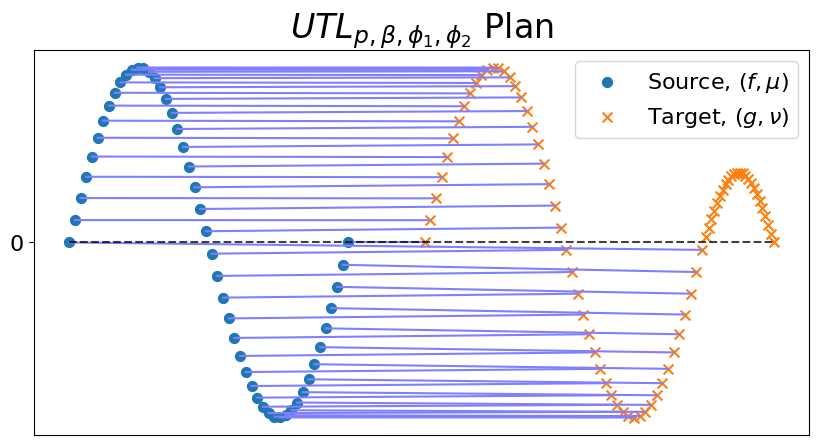

In [ ]:
plot_graph(signal1,signal2,plan)
plt.savefig('./UTL_Plan.pdf',bbox_inches='tight')

In [ ]:
p=np.ones((50))/50.
q=np.ones((75))/75.
plan = ot.emd(p, q, M)
print(plan.shape)

(50, 75)


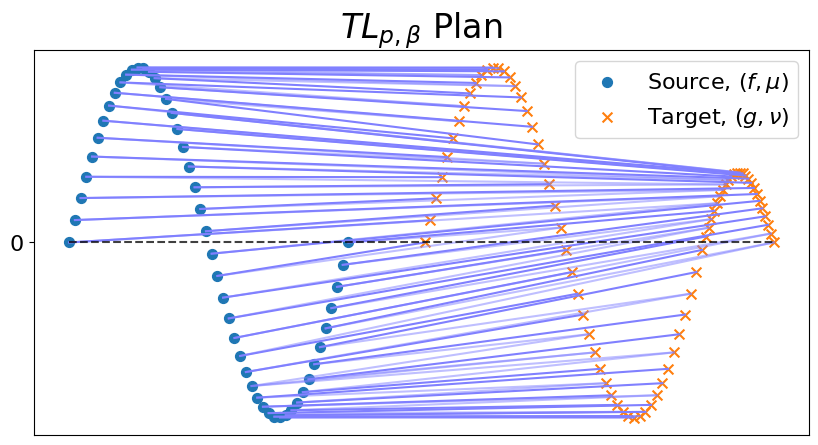

In [ ]:
plot_graph(signal1,signal2,plan,title=r'$TL_{p,\beta}$ Plan')
plt.savefig('./TL_Plan.pdf',bbox_inches='tight')